# ELM regression

Notebook to perform an elm with sine activation functions  regression

### 1) Imports

In [1]:
#utilities
import numpy as np 
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
# pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
import seaborn as sns
seaborn_blue=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
seaborn_orange=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
seaborn_green=(0.3333333333333333, 0.6588235294117647, 0.40784313725490196)
sns.set()
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
import itertools
from tqdm import tqdm
import time

from sklearn.metrics import mean_squared_error,max_error
from keras.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16, 8)
from weighted_elm import *

### 2) Read Data

In [3]:
days=1
prop_ephe_name="G01_orbit_ECEF_b.txt"

In [4]:
"""
Example of how the propagated file should be structured (without the # at the beginning of the row)
Datapoints must be provided every minute
"""

'\nExample of how the propagated file should be structured (without the # at the beginning of the row)\nDatapoints must be provided every minute\n'

In [5]:
# % GPSTIME                             X                       Y                       Z                       VX                       VY                      VZ         
#    2458736.5      0.0000000000    -0.14191298395000E+08    0.43338783220000E+07    0.21811823968000E+08   -0.53278189718677E+03   -0.27647244092224E+04    0.23153739817080E+03
#    2458736.5      0.0006944444    -0.14223572127618E+08    0.41680094087114E+07    0.21824863699006E+08   -0.54300366151162E+03   -0.27641970348062E+04    0.20311821412304E+03
#    2458736.5      0.0013888889    -0.14256458138822E+08    0.40021797371790E+07    0.21836197931779E+08   -0.55319072008632E+03   -0.27634164179937E+04    0.17468783620157E+03
#    2458736.5      0.0020833333    -0.14289954263030E+08    0.38364044893906E+07    0.21845826062743E+08   -0.56334029945128E+03   -0.27623829842186E+04    0.14624853281378E+03
#    2458736.5      0.0027777778    -0.14324058168446E+08    0.36706988205974E+07    0.21853747624404E+08   -0.57344963257647E+03   -0.27610971990579E+04    0.11780257161117E+03
#    2458736.5      0.0034722222    -0.14358767357457E+08    0.35050778569139E+07    0.21859962285299E+08   -0.58351595937665E+03   -0.27595595681200E+04    0.89352219288812E+02
#    2458736.5      0.0041666667    -0.14394079167066E+08    0.33395566929203E+07    0.21864469849932E+08   -0.59353652722417E+03   -0.27577706369259E+04    0.60899741385237E+02
#    2458736.5      0.0048611111    -0.14429990769355E+08    0.31741503892730E+07    0.21867270258703E+08   -0.60350859146020E+03   -0.27557309907827E+04    0.32447402082873E+02
#    2458736.5      0.0055555556    -0.14466499171979E+08    0.30088739703170E+07    0.21868363587813E+08   -0.61342941590286E+03   -0.27534412546510E+04    0.39974640091374E+01
#    2458736.5      0.0062500000    -0.14503601218687E+08    0.28437424217166E+07    0.21867750049173E+08   -0.62329627335519E+03   -0.27509020930039E+04   -0.24447811961847E+02
#    2458736.5      0.0069444444    -0.14541293589881E+08    0.26787706880823E+07    0.21865429990286E+08   -0.63310644610861E+03   -0.27481142096800E+04   -0.52886166906865E+02
#    2458736.5      0.0076388889    -0.14579572803196E+08    0.25139736706204E+07    0.21861403894128E+08   -0.64285722644685E+03   -0.27450783477288E+04   -0.81315344050532E+02
#    2458736.5      0.0083333333    -0.14618435214116E+08    0.23493662247803E+07    0.21855672379013E+08   -0.65254591714517E+03   -0.27417952892494E+04   -0.10973308896152E+03
#    2458736.5      0.0090277778    -0.14657877016620E+08    0.21849631579190E+07    0.21848236198444E+08   -0.66216983196864E+03   -0.27382658552218E+04   -0.13813714974802E+03
#    2458736.5      0.0097222222    -0.14697894243855E+08    0.20207792269722E+07    0.21839096240957E+08   -0.67172629616723E+03   -0.27344909053321E+04   -0.16652527725251E+03
#    2458736.5      0.0104166667    -0.14738482768839E+08    0.18568291361374E+07    0.21828253529952E+08   -0.68121264696843E+03   -0.27304713377900E+04   -0.19489522524570E+03
#    2458736.5      0.0111111111    -0.14779638305194E+08    0.16931275345688E+07    0.21815709223509E+08   -0.69062623406744E+03   -0.27262080891400E+04   -0.22324475061968E+03
#    2458736.5      0.0118055556    -0.14821356407914E+08    0.15296890140834E+07    0.21801464614195E+08   -0.69996442011436E+03   -0.27217021340658E+04   -0.25157161358032E+03
#    2458736.5      0.0125000000    -0.14863632474148E+08    0.13665281068767E+07    0.21785521128861E+08   -0.70922458119825E+03   -0.27169544851878E+04   -0.27987357783875E+03
#    2458736.5      0.0131944444    -0.14906461744029E+08    0.12036592832560E+07    0.21767880328428E+08   -0.71840410732905E+03   -0.27119661928538E+04   -0.30814841080202E+03
#    2458736.5      0.0138888889    -0.14949839301519E+08    0.10410969493795E+07    0.21748543907653E+08   -0.72750040291523E+03   -0.27067383449241E+04   -0.33639388376291E+03
#    2458736.5      0.0145833333    -0.14993760075287E+08    0.87885544501454E+06    0.21727513694897E+08   -0.73651088723945E+03   -0.27012720665483E+04   -0.36460777208884E+03
#    2458736.5      0.0152777778    -0.15038218839620E+08    0.71694904130709E+06    0.21704791651870E+08   -0.74543299493050E+03   -0.26955685199371E+04   -0.39278785540980E+03
#    2458736.5      0.0159722222    -0.15083210215352E+08    0.55539193856312E+06    0.21680379873373E+08   -0.75426417643166E+03   -0.26896289041275E+04   -0.42093191780546E+03

In [6]:
#read propagated orbit
prop = np.genfromtxt(prop_ephe_name,comments='%')

prop[:,2:]/=1000
prop_15=prop[::15]
t_p = prop[:,0] + prop[:,1]
x_p = prop[:,2]
y_p = prop[:,3]
z_p = prop[:,4]
prop_data=np.vstack((t_p,x_p,y_p,z_p)).T
prop15=np.vstack((prop_15[:,0]+prop_15[:,1],
                    prop_15[:,2],prop_15[:,3],prop_15[:,4])).T

In [7]:
idx=96*days

#rescale time
T = prop15[:idx,0]
X = prop15[:idx,1].reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
T_scaler = MinMaxScaler(feature_range=(-1,1))
T_scaler.fit(T.reshape(-1,1))
rescaled_T=T_scaler.transform(T.reshape(-1,1))

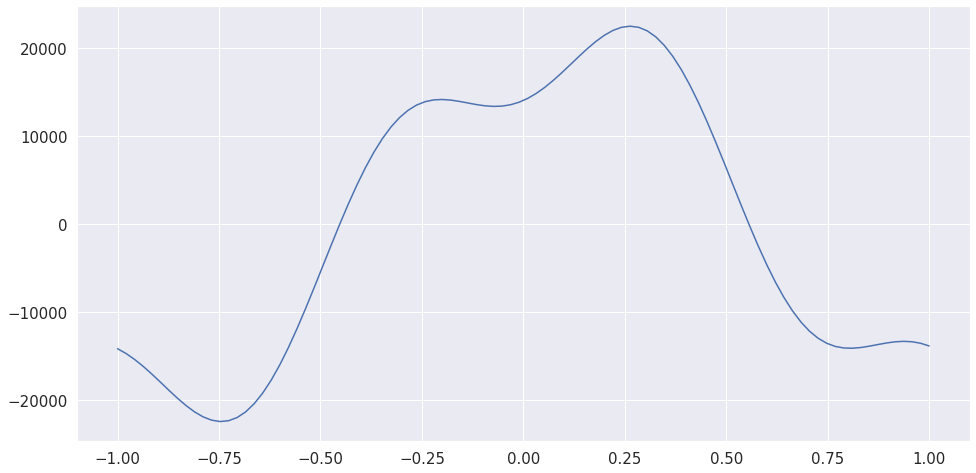

In [8]:
plt.plot(rescaled_T,X)

### 3) Fit ELM with different hidden neurons number

In [9]:
# arbitrary parameters to define the different N
a=15*(days)
b=35*days
hidden_sizes=np.arange(150,162,2)
print(len(hidden_sizes), hidden_sizes)

6 [150 152 154 156 158 160]


In [99]:
grid_search=True
if grid_search:
    HIDDEN_SIZE_LOG=[]
    RMS_LOG = []
    MAX_LOG = []
    N_LOG=[]
    W_SEED_LOG=[]
    B_SEED_LOG=[]
    #start search
    for hidden_size in tqdm(hidden_sizes):
        rms_trials=[]
        max_err_trials=[]
        w_seeds=[]
        b_seeds=[]
        for trial in range(10000):
            weight_seed = np.random.randint(2e9)
            bias_seed = np.random.randint(2e9)
            model = elm(hidden_units=hidden_size,
                        x = rescaled_T, y = X,
                        weight_seed=weight_seed,bias_seed=bias_seed)
            beta = model.fit()
            
            pred_data=model.predict(rescaled_T).reshape(-1)
            
            max_err=max_error(y_true=X,y_pred=pred_data)*1000
            rms=mean_squared_error(pred_data,X,squared=False)*1000
            max_err_trials.append(max_err)
            rms_trials.append(rms)
            w_seeds.append(weight_seed)
            b_seeds.append(bias_seed)

        
        best_idx=np.argmin(rms_trials)
        W_SEED_LOG.append(w_seeds[best_idx])
        B_SEED_LOG.append(b_seeds[best_idx])
        
        HIDDEN_SIZE_LOG.append(hidden_size)
        RMS_LOG.append(rms_trials[best_idx])
        MAX_LOG.append(max_err_trials[best_idx])
        N_LOG.append(hidden_size+2)

log = {'N_Neurons': HIDDEN_SIZE_LOG,
        "weight_seed":W_SEED_LOG,
        "bias_seed":B_SEED_LOG,
        "N":N_LOG,
        "rms":RMS_LOG,
        "max_err":MAX_LOG}
df_log = pd.DataFrame(log)

 17%|█▋        | 1/6 [05:29<27:28, 329.77s/it]

0.9116647913043671


 33%|███▎      | 2/6 [10:58<21:57, 329.43s/it]

1.1948726963421632


 50%|█████     | 3/6 [17:13<17:30, 350.16s/it]

1.0106155009412128


 67%|██████▋   | 4/6 [21:48<10:40, 320.48s/it]

1.0071514678916638


 83%|████████▎ | 5/6 [26:18<05:02, 302.08s/it]

0.8903279925934657


100%|██████████| 6/6 [30:49<00:00, 308.33s/it]

0.5010550463307877


In [10]:
# sort results by RMS
results = df_log.sort_values(["rms"]) 
results

,N_Neurons,weight_seed,bias_seed,N,rms,max_err
31,186,32142193,54920964,188,2.297,6.428
16,156,33765766,88547190,158,3.053,8.088
39,202,18882343,78554712,204,3.223,9.289
44,212,77379673,6684902,214,3.250,11.349
42,208,79389127,80547503,210,3.252,9.809
33,190,61461592,77626716,192,3.294,9.910
48,220,16366068,55030820,222,3.337,8.038
43,210,93291735,85049823,212,3.456,9.042
27,178,70813975,19879166,180,3.496,10.422
45,214,27208155,40233570,216,3.532,9.489


max error 87.94898748601554
rmse 28.58


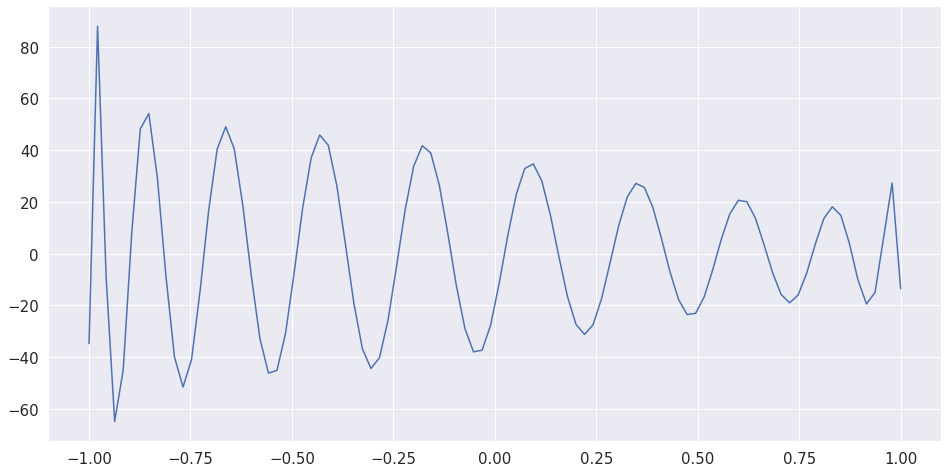

In [20]:
# plot error for a given combination of seeds 
weight_seed = 15650425
bias_seed = 31961905
hidden_size=20
model = elm(hidden_units=hidden_size,
                        x=rescaled_T, y=X.reshape(-1,1),
                        weight_seed=weight_seed,bias_seed=bias_seed)
beta = model.fit()
#save to file
np.savez_compressed("elm_coeffs",A=beta[0],ws=weight_seed,bs=bias_seed)

pred_data = model.predict(rescaled_T)
error = (pred_data-X)*1000
mse = mean_squared_error(pred_data,X,squared=False)*1000
print("max error",max_error(pred_data,X)*1000)
print("rmse",mse.round(3))
# plt.plot(rescaled_T,pred_data)
plt.plot(rescaled_T.reshape(-1),(X.reshape(-1)-pred_data)*1000)